### Импорт библиотек и данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df1 = pd.read_csv('datasets/daily-total-female-births-in-cal.csv')
df2 = pd.read_csv('datasets/mean-monthly-air-temperature-deg.csv')
df3 = pd.read_csv('datasets/monthly-boston-armed-robberies-j.csv')
df4 = pd.read_csv('datasets/monthly-sales-of-company-x-jan-6.csv')
df5 = pd.read_csv('datasets/weekly-closings-of-the-dowjones-.csv')

### Изучение и обработка данных

In [3]:
def display_data(*datas):
    for data in datas:
        display(data.head(4))
        display(data.info())
        for col in data.columns:
            if 'Date' in col:
                data[col] = pd.to_datetime(data[col])
                data.set_index('Date', inplace=True)
            elif 'Month' in col:
                data[col] = pd.to_datetime(data[col], format='%Y-%m')
                data.set_index('Month', inplace=True)
            elif 'Week' in col:
                data[col] = data[col].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y-W%W-%w"))
                data.set_index('Week', inplace=True)
            else:
                pass
        display(data.info())
        display(data.isna().mean())
        display(data.duplicated().sum())

display_data(df1, df2, df3, df4, df5)

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Count   365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


None

Count    0.0
dtype: float64

326

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   240 non-null    object 
 1   Deg     240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1920-01-01 to 1939-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Deg     240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


None

Deg    0.0
dtype: float64

89

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   118 non-null    object
 1   Count   118 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1966-01-01 to 1975-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   118 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


None

Count    0.0
dtype: float64

17

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   77 non-null     object
 1   Count   77 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 1965-01-01 to 1971-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   77 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


None

Count    0.0
dtype: float64

6

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Week    162 non-null    object 
 1   Close   162 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 1971-07-05 to 1974-08-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   162 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


None

Close    0.0
dtype: float64

3

### Тест на стационарность

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
Ряд стационарный (данные не имеют единичного корня)


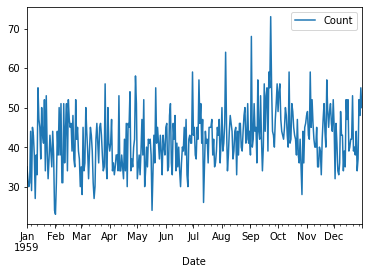

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64
Ряд стационарный (данные не имеют единичного корня)


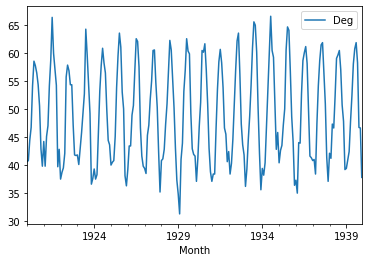

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
Ряд нестационарный (данные имеют единичный корень)


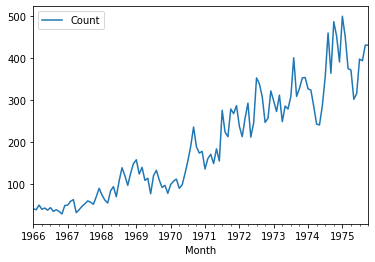

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Ряд нестационарный (данные имеют единичный корень)


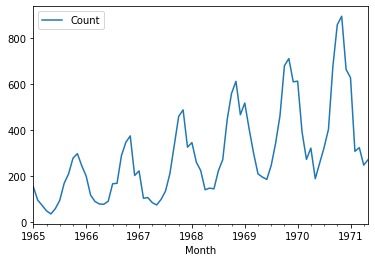

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64
Ряд нестационарный (данные имеют единичный корень)


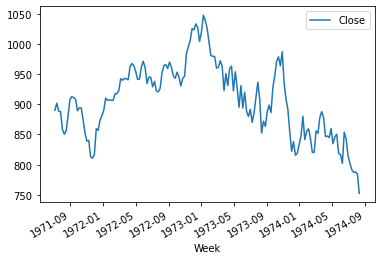

  
-------------------


In [4]:
def test_stationarity(*dfs):
    for df in dfs:
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(df, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for [key, value] in dftest[4].items():
            dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)
        if dfoutput['Test Statistic'] > dfoutput['Critical Value (5%)']:
            print("Ряд нестационарный (данные имеют единичный корень)")
        else:
            print("Ряд стационарный (данные не имеют единичного корня)")
        
        df.plot()
        plt.show()
        print('  ')
        print('-------------------')
                
test_stationarity(df1, df2, df3, df4, df5)

Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64
Ряд стационарный (данные не имеют единичного корня)


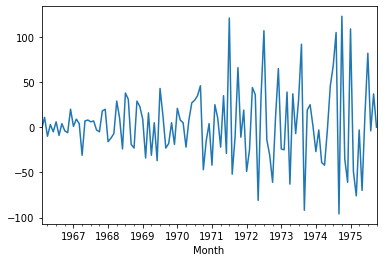

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                 -2.587970
p-value                         0.095509
#Lags Used                     12.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64
Ряд нестационарный (данные имеют единичный корень)


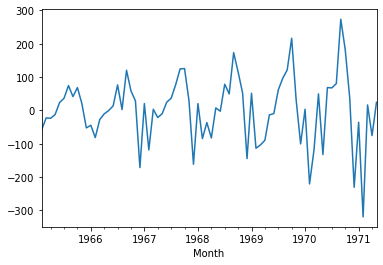

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64
Ряд стационарный (данные не имеют единичного корня)


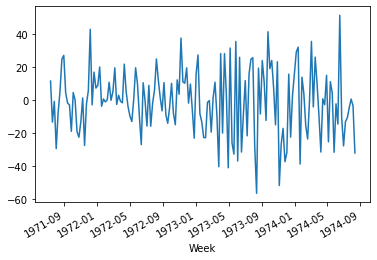

  
-------------------


In [6]:
def diff(*dfs):
    result = []
    for df in dfs:
        df_copy = df.copy()  # создаем копию датафрейма
        for col in df_copy.columns:
            if 'Count' in col or 'Deg' in col or 'Close' in col:
                df_copy[col] = df_copy[col].diff()
                df_copy = df_copy[col].dropna()

        result.append(df_copy)

    return result

df_diff = diff(df3, df4, df5)

for df in df_diff:
    test_stationarity(df)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64
Ряд стационарный (данные не имеют единичного корня)


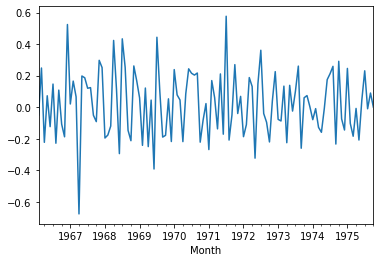

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Ряд стационарный (данные не имеют единичного корня)


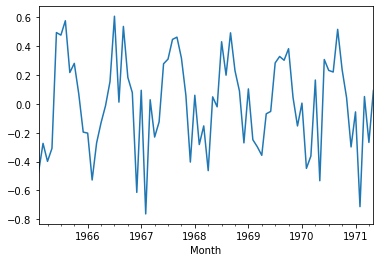

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64
Ряд стационарный (данные не имеют единичного корня)


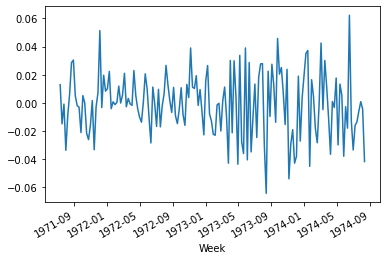

  
-------------------


In [7]:
def log_diff(*dfs):
    result = []
    for df in dfs:
        df_copy = df.copy()  
        for col in df_copy.columns:
            if 'Count' in col or 'Deg' in col or 'Close' in col:
                df_copy[col] = np.log(df_copy[col])
                df_copy[col] = df_copy[col].diff()
                df_copy = df_copy[col].dropna()
        result.append(df_copy)        
    return result

df_log = log_diff(df3,df4,df5)
for df in df_log:
    test_stationarity(df)

### Модель

#### Скользящее среднее (MA)

In [8]:
df_not_st = df3.copy()
df_not_st.head()

def moving_average(df, n):
    
    rolling_mean = df.rolling(window=n, min_periods=1).mean()
    
    MAE= mean_absolute_error(df[n:], rolling_mean[n:])
    MSE = mean_squared_error(df[n:], rolling_mean[n:])
    RMSE = np.sqrt(MSE)
    R2 = r2_score(df[n:], rolling_mean[n:])
    print('MAE: {:.4f}'.format(MAE))
    print('MSE: {:.4f}'.format(MSE))
    print('RMSE: {:.4f}'.format(RMSE))
    print('R2: {:.4f}'.format(R2))
    
    plt.figure(figsize=(10,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g",label="Rolling mean trend")
    plt.plot(df[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

MAE: 28.7233
MSE: 1674.5233
RMSE: 40.9209
R2: 0.8933


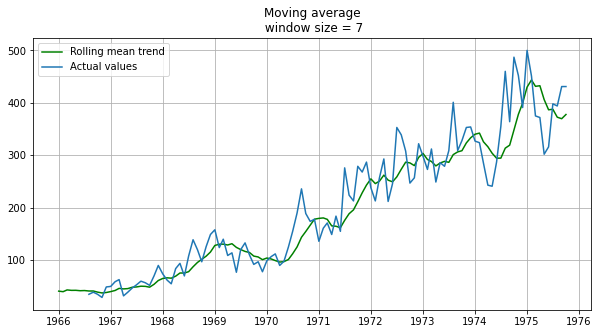

In [9]:
moving_average(df_not_st, 7)

MAE: 30.2117
MSE: 1584.8514
RMSE: 39.8102
R2: 0.1130


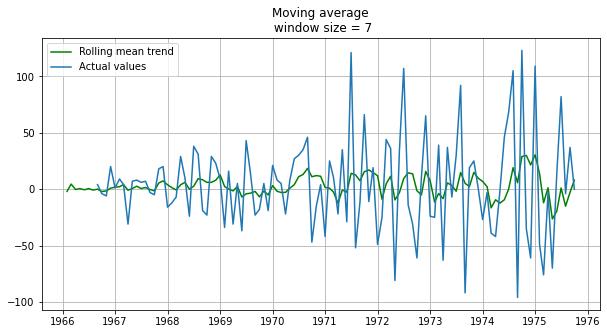

In [10]:
moving_average(df_diff[0], 7)

#### Взвешенное скользящее среднее (WMA)

In [12]:
def weighted_moving_average_1(df, n):
    weights = np.arange(1, n+1)
    weights = weights / weights.sum()
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    wma = df.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    MAE= mean_absolute_error(df[n:], wma[n:])
    MSE = mean_squared_error(df[n:], wma[n:])
    RMSE = np.sqrt(MSE)
    R2 = r2_score(df[n:], wma[n:])
    print('MAE: {:.4f}'.format(MAE))
    print('MSE: {:.4f}'.format(MSE))
    print('RMSE: {:.4f}'.format(RMSE))
    print('R2: {:.4f}'.format(R2))
    
    plt.figure(figsize=(10,5))
    plt.title('Weighted moving average')
    plt.plot(wma, "g",label="WMA")
    plt.plot(df[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

MAE: 23.4122
MSE: 1081.9055
RMSE: 32.8923
R2: 0.9310


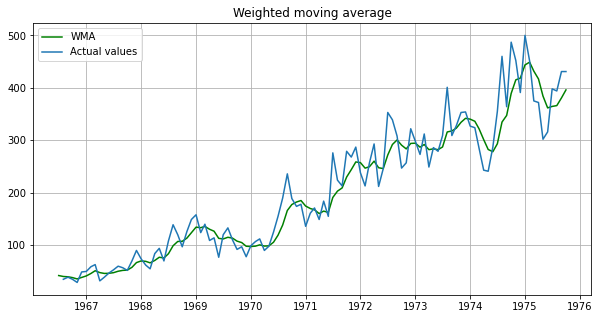

In [13]:
weighted_moving_average_1(df_not_st, 7)

MAE: 27.5179
MSE: 1311.4199
RMSE: 36.2135
R2: 0.2660


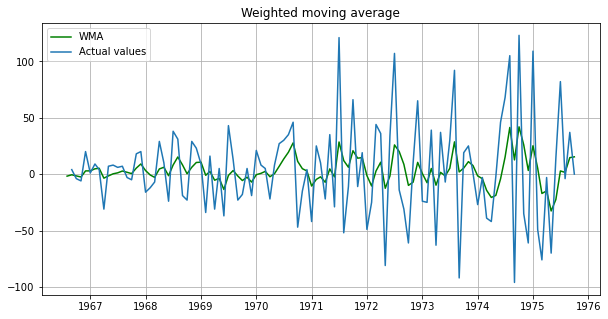

In [14]:
weighted_moving_average_1(df_diff[0], 7)

#### Экспоненциальное сглаживание (EMA)

In [15]:
def exponential_moving_average_1(df, alpha=0.3):
    
    ema = df.ewm(alpha=alpha, adjust=False).mean()
    
    MAE= mean_absolute_error(df[1:], ema[1:])
    MSE = mean_squared_error(df[1:], ema[1:])
    RMSE = np.sqrt(MSE)
    R2 = r2_score(df[1:], ema[1:])
    print('MAE: {:.4f}'.format(MAE))
    print('MSE: {:.4f}'.format(MSE))
    print('RMSE: {:.4f}'.format(RMSE))
    print('R2: {:.4f}'.format(R2))
    
    plt.figure(figsize=(10,5))
    plt.title('EMA')
    plt.plot(ema, "g",label="Rolling mean trend")
    plt.plot(df[1:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

MAE: 20.3940
MSE: 854.3052
RMSE: 29.2285
R2: 0.9472


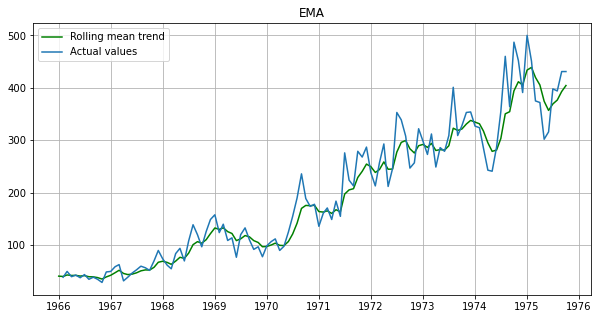

In [16]:
exponential_moving_average_1(df_not_st)

MAE: 24.6709
MSE: 1084.3149
RMSE: 32.9289
R2: 0.3616


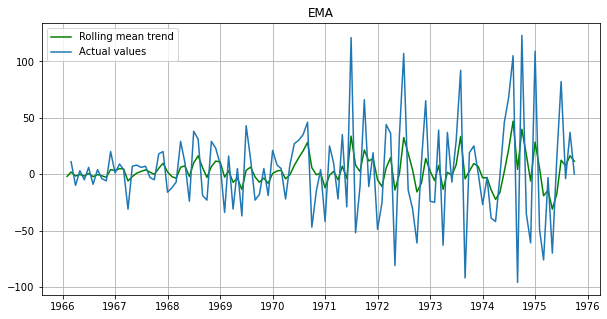

In [17]:
exponential_moving_average_1(df_diff[0])

#### Двойное экспоненциальное сглаживание (DEMA)

In [18]:
def double_ema(df, alpha=0.3, beta=0.1):

    ema1 = df.ewm(alpha=alpha, adjust=False).mean()
    ema2 = df.ewm(alpha=beta, adjust=False).mean()
    double_ema = 2 * ema1 - ema2

    MAE = mean_absolute_error(df[1:], double_ema[1:])
    MSE = mean_squared_error(df[1:], double_ema[1:])
    RMSE = np.sqrt(MSE)
    R2 = r2_score(df[1:], double_ema[1:])

    print('MAE: {:.4f}'.format(MAE))
    print('MSE: {:.4f}'.format(MSE))
    print('RMSE: {:.4f}'.format(RMSE))
    print('R2: {:.4f}'.format(R2))
    
    plt.figure(figsize=(10,5))
    plt.title('DEMA')
    plt.plot(double_ema, "g",label="Rolling mean trend")
    plt.plot(df[1:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)


MAE: 21.1304
MSE: 821.5926
RMSE: 28.6634
R2: 0.9492


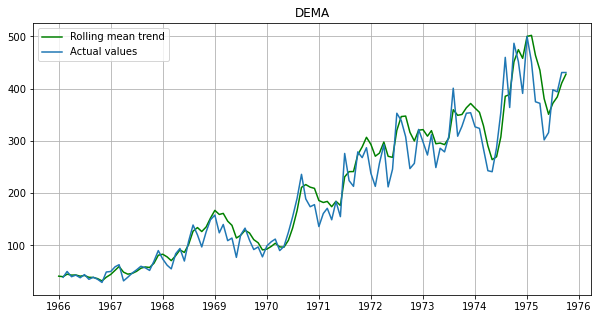

In [19]:
double_ema(df_not_st)

MAE: 20.6903
MSE: 797.2222
RMSE: 28.2351
R2: 0.5306


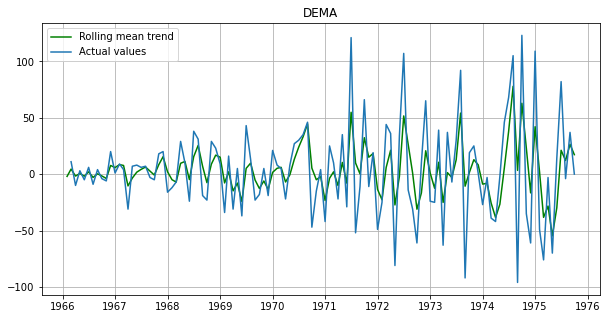

In [20]:
double_ema(df_diff[0])

#### Тройное экспоненциальное сглаживание (TEMA)

In [21]:
def triple_ema(df, alpha=0.2, beta=0.2, gamma=0.2):
    
    ema1 = df.ewm(alpha=alpha, adjust=False).mean()
    ema2 = ema1.ewm(alpha=beta, adjust=False).mean()
    ema3 = ema2.ewm(alpha=gamma, adjust=False).mean()
    triple_ema = 3 * ema1 - 3 * ema2 + ema3

    MAE = mean_absolute_error(df[1:], triple_ema[1:])
    MSE = mean_squared_error(df[1:], triple_ema[1:])
    RMSE = np.sqrt(MSE)
    R2 = r2_score(df[1:], triple_ema[1:])

    print('MAE: {:.4f}'.format(MAE))
    print('MSE: {:.4f}'.format(MSE))
    print('RMSE: {:.4f}'.format(RMSE))
    print('R2: {:.4f}'.format(R2))
    
    plt.figure(figsize=(10,5))
    plt.title('TEMA')
    plt.plot(triple_ema, "g",label="Rolling mean trend")
    plt.plot(df[1:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

MAE: 16.4971
MSE: 524.1360
RMSE: 22.8940
R2: 0.9676


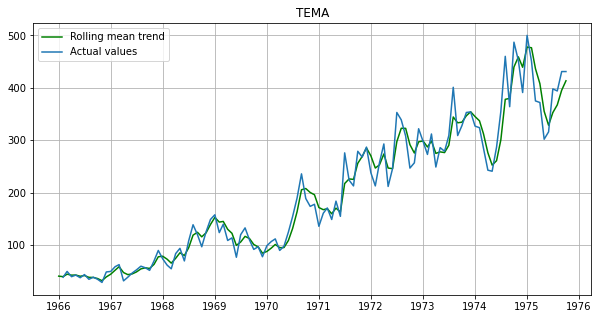

In [22]:
triple_ema(df_not_st)

MAE: 20.5251
MSE: 776.5712
RMSE: 27.8670
R2: 0.5428


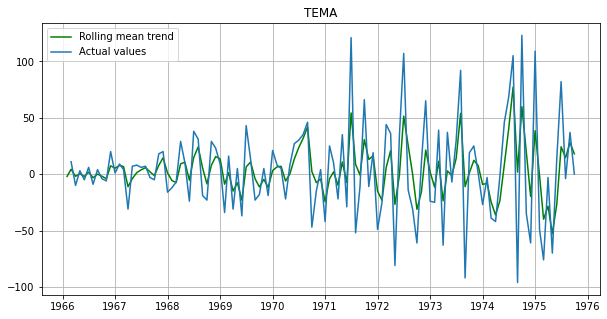

In [23]:
triple_ema(df_diff[0])

### Вывод

Таким образом, проанализировав метрики и примененные модели к стационарному и нестационарному ряду, можно сделать вывод, что модель TEMA подходит лучше всего.